In [1]:
from pathlib import Path
import csv
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
root=  Path('.')

In [3]:
list(root.iterdir())

[PosixPath('.ipynb_checkpoints'),
 PosixPath('Airbus.ipynb'),
 PosixPath('sample_submission_v2.csv'),
 PosixPath('test_v2'),
 PosixPath('test_v2.zip'),
 PosixPath('train_ship_segmentations_v2.csv'),
 PosixPath('train_v2'),
 PosixPath('train_v2.zip')]

In [4]:
segmentation = root/'train_ship_segmentations_v2.csv'

In [5]:
import codecs

In [6]:
rows = []
with open(str(segmentation)) as f:
    segmentation_csv =  csv.reader(f)
    for row in segmentation_csv:
        rows.append(row)
        if len(rows)>10: break

print(rows[10])

['00021ddc3.jpg', '108287 1 109054 3 109821 4 110588 5 111356 5 112123 6 112890 7 113657 8 114424 9 115191 10 115958 11 116725 12 117493 12 118260 13 119027 14 119794 14 120561 14 121328 15 122095 15 122863 14 123630 14 124397 14 125164 14 125931 15 126698 15 127465 15 128232 15 129000 14 129767 14 130534 15 131301 15 132070 13 132839 11 133608 9 134378 6 135147 5 135916 3 136685 1']


In [7]:
img_path = root/'train_v2'/'00021ddc3.jpg'


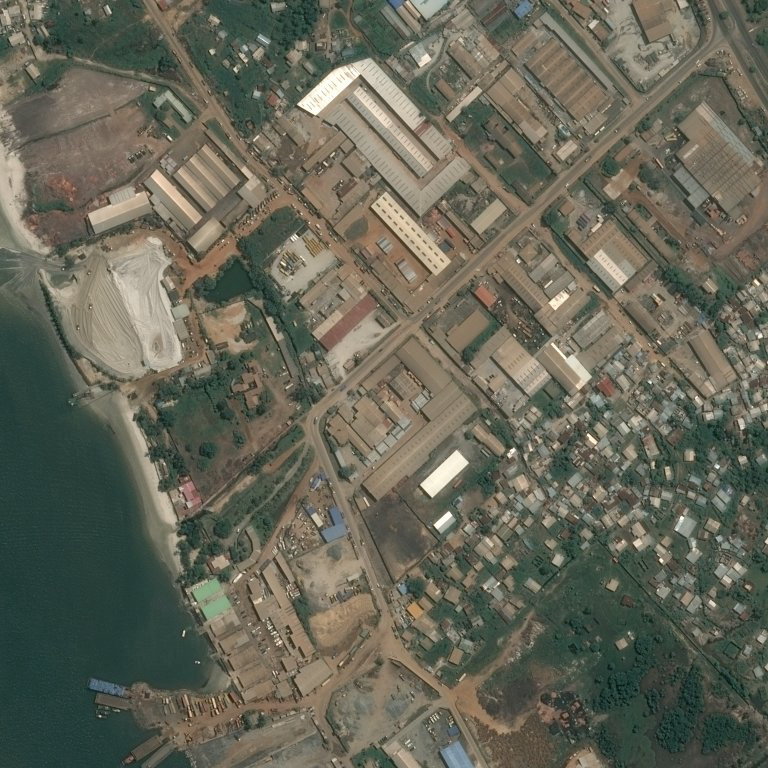

In [8]:
im = Image.open(str(img_path))
im

In [9]:
im.size

(768, 768)

In [10]:
mask = np.zeros(768**2)
mask.shape

(589824,)

In [11]:
row= rows[10]

In [12]:
def pairwise(it):
    it = iter(it)
    while True:
        try:
            yield next(it),next(it)
        except StopIteration:
            return
        


In [13]:
for pixel, runlen in pairwise(row[-1].split()):
    print(pixel,runlen)
    mask[int(pixel):int(pixel)+int(runlen)] = 1

108287 1
109054 3
109821 4
110588 5
111356 5
112123 6
112890 7
113657 8
114424 9
115191 10
115958 11
116725 12
117493 12
118260 13
119027 14
119794 14
120561 14
121328 15
122095 15
122863 14
123630 14
124397 14
125164 14
125931 15
126698 15
127465 15
128232 15
129000 14
129767 14
130534 15
131301 15
132070 13
132839 11
133608 9
134378 6
135147 5
135916 3
136685 1


In [14]:
mask_img = mask.reshape((768,768))

flipped_mask = np.flipud(np.rot90(mask_img))

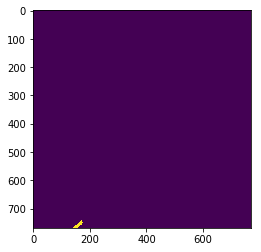

In [15]:
 plt.imshow(flipped_mask)

In [16]:
three_ch_mask = np.dstack((flipped_mask,flipped_mask,flipped_mask))

three_ch_mask.shape

(768, 768, 3)

In [17]:
np.array(im).max()

255

In [18]:
overlaid = np.array(im)+ (three_ch_mask*255)

In [19]:
clipped_overlaid = np.clip(overlaid,0,255)

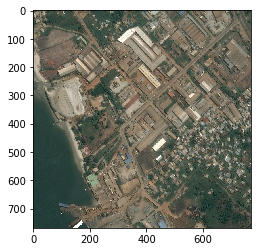

In [20]:
plt.imshow(clipped_overlaid.astype(np.uint8))